In [6]:
# Z空間で表現されたフィルタの周波数特性を求める
# Frequency Response of the filter represented in Z-domain
#
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
#
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.fftpack as sfft

In [7]:
# 信号処理ツールの freqz() を利用する
# Utilize freqz() in scipy.sgnal modlue

# filter Definition
b = np.array([1,-0.97])
w, h = ss.freqz(b)

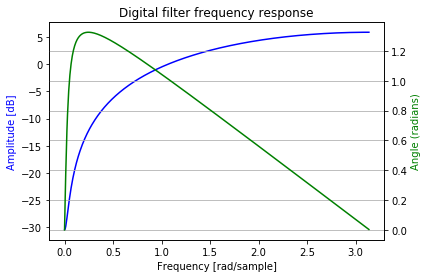

In [8]:
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

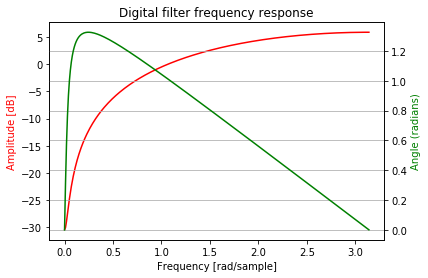

In [11]:
# freqzを使わずに
# Not use freqz()

#w = np.linspace(0,np.pi,100)
w = np.arange(0,np.pi,0.01)

# pre-emphasis filter (1-a*z^-1)
a = 0.97

#amp = abs(1-a*np.exp(-1j*w))
amp = np.sqrt(1+a*a-2*a*np.cos(w))

#ang = np.angle(1-a*np.exp(-1j*w))
ang = np.arctan(a*np.sin(w)/(1-a*np.cos(w)))

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')

ax1.plot(w, 20 * np.log10(amp), 'r')
ax1.set_ylabel('Amplitude [dB]', color='r')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
ax2.plot(w, ang, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()
